In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1 선형 회귀

- 선형 회귀 모델의 예측은 다음과 같다
$$\hat{y}=\theta_0+\theta_1 x_1+\theta_2 x_2+\theta_3 x_3 + ... + \theta_n x_n$$
$$\hat{y}=h_\theta(x)=\theta^T \cdot x$$
- 이때 $\hat{y}$의 RMSE가 최소가 되는 $\theta$를 찾는게 목표이다
- $\theta$는 해석적인 방법으로 찾을 수 있다. 이를 __정규방정식__이라고 한다.

$$\hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$$

In [63]:
X= 2*np.random.rand(100,1) # 100 samples, uniform distribution bewteen 0 and 2
y=3*X+4+np.random.randn(100,1) # add noise

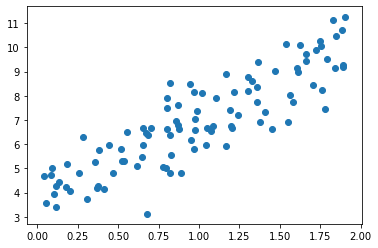

In [64]:
plt.scatter(X,y)

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_) # 상수항, 1차항
print(lin_reg.predict(np.array([[0],[2]]))) # 예측된 y 값들

[3.82827989] [[3.14606639]]
[[ 3.82827989]
 [10.12041268]]


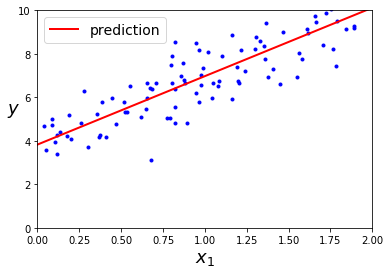

In [67]:
X_new=np.linspace(0, 2, 100).reshape(100, 1) # 0부터 2까지 100개의 원소를 가지는 행렬
y_new = lin_reg.predict(X_new) # 회귀 곡선

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 10])
plt.show()

# 4.2 경사하강법 Gradient Descent
- 비용함수를 최소화 하기 위해 반복해서 파라미터를 조정해가는 것
- MSE가 최소가 되는 $\theta$를 찾는 것이 목표
$$ \theta=\theta-\eta \nabla_\theta MSE(\theta)$$

### 4.2.1 배치 경사 하강법 Batch Gradient Descent
    - 전체 샘플 X에 대한 비용함수의 Gradient 계산 
    - 한번의 스텝에 시간이 오래 걸림
    - 적절한 학습률을 찾는 것이 중요
### 4.2.2 확률적 경사 하강법 Stocastic Gradient Descent
    - 매 스텝에서 한개의 샘플을 무작위로 선택하고 해당 샘플에 대한 비용 함수의 Gradient 계산
    - 배치 경사 하강법보다 불안정
    - 학습률을 감소시켜야 전역 최소값에 다다를 수 있다. (학습 스케쥴)
    
### 4.2.3 미니배치 경사 하강법 Mini-batch Gradient Descent
    - 미니배치라고 부르는 작은 샘플 세트에 대해 그래디언트 계산

In [68]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,penalty=None,eta0=0.01) # 반복횟수, 규제, initial learning rate
sgd_reg.fit(X,y.ravel()) # ravel 은 y를 1차원 배열로 만들어 줌

print(sgd_reg.intercept_,sgd_reg.coef_)

[3.4620533] [3.46147173]


# 4.3 다항 회귀 Polinomial Regression
- 비선형 데이터를 학습시키는 데 선형 모델을 사용할 수 있다
- 특성의 거듭제곱을 새로운 특성으로 추가하면 됨, 즉 [1,x,x^2]를 하나의 샘플로 사용하는 것

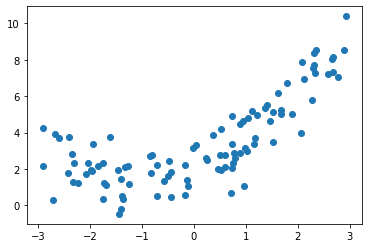

In [69]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.scatter(X,y)

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False) # 주어진 차수까지 특성간의 모든 교차항 추가
X_poly=poly_features.fit_transform(X) # [X,X^2] 배열 생성
print(X_poly[:10])

[[-0.8417668   0.70857134]
 [-1.40280487  1.9678615 ]
 [ 0.97618343  0.95293409]
 [ 0.88490567  0.78305804]
 [ 2.35267727  5.53509033]
 [ 1.67101287  2.79228403]
 [-0.43664175  0.19065602]
 [-1.73264267  3.00205063]
 [ 1.68529032  2.84020346]
 [-1.85337727  3.43500731]]


In [71]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_) #상수항, 1차항, 2차항

[2.07615018] [[1.05378339 0.47579839]]


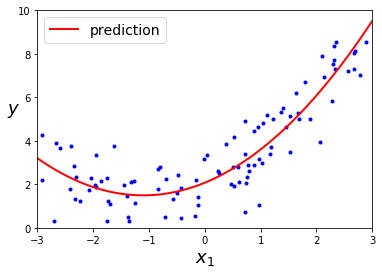

In [73]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # -3부터 3까지 100개의 원소를 가지는 행렬
X_new_poly = poly_features.transform(X_new) # 선형회귀모델에 입력하기 위해 transform
y_new = lin_reg.predict(X_new_poly) # 회귀 곡선

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선
- 고차 다항 회귀 모델에서 차수를 노무 높게 설정하면 overfitting, 차수를 너무 낮게 설정하면 underfitting 발생
- 모델이 데이터에 overfitting, 또는 underfitting 되어있다는 것을 알기 위해 학습 곡선을 사용할 수 있다.

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10) # train test 분리
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # 훈련시키기
        y_train_predict = model.predict(X_train[:m]) # 훈련 결과
        y_val_predict = model.predict(X_val) # validation data로 테스트한 결과
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # error
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # error

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 빠짐
    plt.xlabel("size of data set", fontsize=14)       # 책에는 빠짐
    plt.ylabel("RMSE", fontsize=14)              # 책에는 빠짐

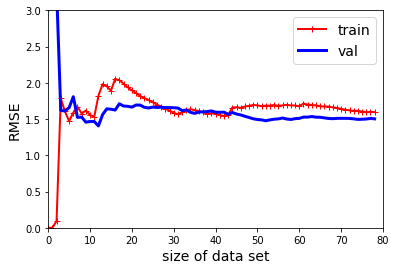

In [80]:
# 훈련데이터에 과소적합된 모델 : 선형회귀 모델로 2차 곡선을 예측하려고 했으니 당연한 결과
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 빠짐
plt.show()                                      # 책에는 빠짐

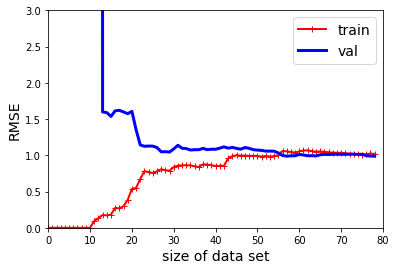

In [81]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 빠짐
plt.show()                        # 책에는 빠짐